<a href="https://colab.research.google.com/github/JustinB6524/DAAN_888/blob/main/DAAN888_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import subprocess
from getpass import getpass

def setup_kaggle():
    """Set up Kaggle API credentials and dependencies."""
    # 1. Create the correct config directory
    config_dir = '/root/.kaggle'  # Changed from /root/.config/kaggle
    os.makedirs(config_dir, exist_ok=True)
    kaggle_json = os.path.join(config_dir, 'kaggle.json')

    # 2. Create credentials file if it doesn’t exist
    if not os.path.exists(kaggle_json):
        print("First-time setup required!")
        print("1. Go to https://www.kaggle.com/settings/account to get your API key")
        print("2. Accept dataset rules if prompted\n")

        username = getpass("Kaggle username: ")
        key = getpass("Kaggle API key: ")

        with open(kaggle_json, 'w') as f:
            f.write(f'{{"username":"{username}","key":"{key}"}}')
        os.chmod(kaggle_json, 0o600)  # Set permissions to owner-only

    # 3. Install the Kaggle API package if missing
    try:
        import kaggle
    except ImportError:
        subprocess.check_call(['pip', 'install', '--quiet', '--upgrade', 'kaggle'])

def download_datasets():
    """Download specified Kaggle datasets."""
    # Run setup first
    setup_kaggle()

    # Import Kaggle API after setup
    from kaggle import KaggleApi

    # Authenticate and download datasets
    api = KaggleApi()
    api.authenticate()

    datasets = [
        'asaniczka/tmdb-movies-dataset-2023-930k-movies',
        'joyshil0599/movie-reviews-dataset-10k-scraped-data'
    ]

    for dataset in datasets:
        try:
            api.dataset_download_files(dataset, path='.', unzip=True)
            print(f"✅ Downloaded {dataset}")
        except Exception as e:
            print(f"❌ Error with {dataset}: {e}")
            raise

# Execute the download process
download_datasets()

First-time setup required!
1. Go to https://www.kaggle.com/settings/account to get your API key
2. Accept dataset rules if prompted

Kaggle username: ··········
Kaggle API key: ··········
Dataset URL: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies
✅ Downloaded asaniczka/tmdb-movies-dataset-2023-930k-movies
Dataset URL: https://www.kaggle.com/datasets/joyshil0599/movie-reviews-dataset-10k-scraped-data
✅ Downloaded joyshil0599/movie-reviews-dataset-10k-scraped-data


In [2]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download -d asaniczka/tmdb-movies-dataset-2023-930k-movies
# !kaggle datasets download -d joyshil0599/movie-reviews-dataset-10k-scraped-data

In [3]:
# !unzip tmdb-movies-dataset-2023-930k-movies.zip
# !unzip movie-reviews-dataset-10k-scraped-data.zip

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings("ignore")

In [5]:
import os
import pandas as pd

# Detect if running in Google Colab
try:
    import google.colab
    in_colab = True
except ImportError:
    in_colab = False

# Set the data directory based on the environment
if in_colab:
    data_dir = "/content/"  # Default path in Colab
else:
    data_dir = "./data/"   # Default path for local machines (a 'data' subfolder)

# Define file paths using the data directory
tmdb_file = os.path.join(data_dir, "TMDB_movie_dataset_v11.csv")
metacritic_file = os.path.join(data_dir, "metacritic-reviews.csv")
letterboxd_file = os.path.join(data_dir, "letterboxd-reviews.csv")

# Check if all files exist before proceeding
for file in [tmdb_file, metacritic_file, letterboxd_file]:
    if not os.path.exists(file):
        print(f"Error: File not found at {file}")
        print("Please ensure the following datasets are placed in the correct directory:")
        print("- TMDB_movie_dataset_v11.csv")
        print("- metacritic-reviews.csv")
        print("- letterboxd-reviews.csv")
        if in_colab:
            print("In Colab, upload the files to '/content/' or adjust 'data_dir' in the code.")
        else:
            print("Locally, place the files in a 'data' subfolder or adjust 'data_dir' in the code.")
        raise FileNotFoundError(f"Missing file: {file}")



In [6]:
# Load the datasets
tmdb_df = pd.read_csv(tmdb_file, encoding="utf-8")
metacritic_df = pd.read_csv(metacritic_file, encoding="ISO-8859-1", on_bad_lines='skip')
letterboxd_df = pd.read_csv(letterboxd_file, encoding="ISO-8859-1")

# Your code continues here...
print("Datasets loaded successfully!")

Datasets loaded successfully!


In [7]:
tmdb_df.rename(columns={'title': 'Movie name'}, inplace=True)

merged_df = tmdb_df.merge(metacritic_df, on="Movie name", how="inner")
merged_df = merged_df.merge(letterboxd_df, on="Movie name", how="inner")
merged_df = merged_df.drop_duplicates()


print(f"Total Records (Rows): {merged_df.shape[0]}")
print(f"Total Columns: {merged_df.shape[1]}\n")
print("Column Headers:", list(merged_df.columns), "\n")
print(merged_df.head())







Total Records (Rows): 18590
Total Columns: 36

Column Headers: ['id', 'Movie name', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'Release Date', 'Rating_x', 'summary', 'User rating', 'Website rating', 'Release Year', 'Rating_y', 'Reviewer name', 'Review date', 'Review', 'Comment count', 'Like count'] 

       id    Movie name  vote_average  vote_count    status release_date  \
0  157336  Interstellar         8.417       32571  Released   2014-11-05   
1  157336  Interstellar         8.417       32571  Released   2014-11-05   
2  157336  Interstellar         8.417       32571  Released   2014-11-05   
3  157336  Interstellar         8.417       32571  Released   2014-11-05   
4  157336  Interstellar         8.417      

In [8]:
# Explore
print(merged_df.info())
print("\n")

print(merged_df.head())
print("\n")

print(merged_df.describe())
print("\n")

print(merged_df.isna().sum())
print("\n")



duplicates = merged_df.duplicated().sum()
print(f"5. Duplicate Rows Remaining: {duplicates}\n")

if 'status' in merged_df.columns:
    print("Unique 'status' Values:", merged_df['status'].unique())
    print()

if 'adult' in merged_df.columns:
    print("Unique 'adult' Values:", merged_df['adult'].unique())
    print()



def parse_star_rating(star_str):
    if not isinstance(star_str, str):
        return None
    star_str = star_str.strip()
    full_stars = star_str.count("â??")
    half_star = 0.5 if "â½" in star_str else 0.0
    return full_stars + half_star

merged_df["Rating_y_cleaned"] = merged_df["Rating_y"].apply(parse_star_rating)

merged_df.drop("Rating_y", axis=1, inplace=True)

# Convert dates
date_cols = ["Release Date", "Review date"]
for col in date_cols:
    if col in merged_df.columns:
        merged_df[col] = pd.to_datetime(merged_df[col], errors="coerce")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18590 entries, 0 to 18589
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18590 non-null  int64  
 1   Movie name            18590 non-null  object 
 2   vote_average          18590 non-null  float64
 3   vote_count            18590 non-null  int64  
 4   status                18590 non-null  object 
 5   release_date          16289 non-null  object 
 6   revenue               18590 non-null  int64  
 7   runtime               18590 non-null  int64  
 8   adult                 18590 non-null  bool   
 9   backdrop_path         7996 non-null   object 
 10  budget                18590 non-null  int64  
 11  homepage              4837 non-null   object 
 12  imdb_id               12300 non-null  object 
 13  original_language     18590 non-null  object 
 14  original_title        18590 non-null  object 
 15  overview           

In [9]:

# Drop cols with many missing non-numerical values, ids, repeat columns
cols_to_drop = [
    "homepage", "backdrop_path", "tagline", "poster_path",
    "release_date", "imdb_id", "keywords", "production_companies", "production_countries", "spoken_languages", "genres", "Release Year"
]
merged_df.drop(columns=[c for c in cols_to_drop if c in merged_df.columns],
               inplace=True,
               errors="ignore")



# Concat digits for like and comment count
def concatenate_all_digits(text):
    if pd.isna(text):
        return None
    digits = re.findall(r'\d+', str(text))
    if not digits:
        return None
    concatenated = "".join(digits)  # e.g. ["6", "6", "08"] -> "6608"
    return int(concatenated)

if "Like count" in merged_df.columns:
    merged_df["Like count"] = merged_df["Like count"].apply(concatenate_all_digits)

if "Comment count" in merged_df.columns:
    merged_df["Comment count"] = merged_df["Comment count"].apply(concatenate_all_digits)


# Check and save
print(merged_df.info())
print(merged_df.isna().sum())
print(merged_df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18590 entries, 0 to 18589
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 18590 non-null  int64         
 1   Movie name         18590 non-null  object        
 2   vote_average       18590 non-null  float64       
 3   vote_count         18590 non-null  int64         
 4   status             18590 non-null  object        
 5   revenue            18590 non-null  int64         
 6   runtime            18590 non-null  int64         
 7   adult              18590 non-null  bool          
 8   budget             18590 non-null  int64         
 9   original_language  18590 non-null  object        
 10  original_title     18590 non-null  object        
 11  overview           17305 non-null  object        
 12  popularity         18590 non-null  float64       
 13  Release Date       18583 non-null  datetime64[ns]
 14  Rating

In [10]:
cleaned_file = "merged_dataset.csv"
merged_df.to_csv(cleaned_file, index=False, encoding="utf-8")
print(f" saved to: {cleaned_file}")

 saved to: merged_dataset.csv


In [11]:
###Further Cleaning and Transformation###

# Replace missing text with a placeholder
merged_df["overview"] = merged_df["overview"].fillna("No overview")
merged_df["Review"] = merged_df["Review"].fillna("No review")
merged_df["Rating_x"] = merged_df["Rating_x"].fillna("No Rating")

merged_df.rename(columns={"Rating_x": "Content_Rating"}, inplace=True)


# Replace missing numerical values
# We may pivot to dropping like count given large number of missing values, but for now we will impute
median_like_count = merged_df["Like count"].median()
merged_df["Like count"] = merged_df["Like count"].fillna(median_like_count)

median_comment_count = merged_df["Comment count"].median()
merged_df["Comment count"] = merged_df["Comment count"].fillna(median_comment_count)

# Replace numerical rating with mean
mean_rating_y = merged_df["Rating_y_cleaned"].mean()
merged_df["Rating_y_cleaned"] = merged_df["Rating_y_cleaned"].fillna(mean_rating_y)


print(merged_df.info())
print(merged_df.isna().sum())
print(merged_df.head())

# Mask for rows where Release Date is missing
missing_mask = merged_df["Release Date"].isna()

# Filter
missing_release_date_df = merged_df[missing_mask]

# Print Movie w Release Date
print(missing_release_date_df[["Movie name", "Release Date"]])

# Insert accurate release date for movie titled Music (missing data)
music_release_date = pd.Timestamp("2021-01-14")
mask = (merged_df["Movie name"] == "Music") & (merged_df["Release Date"].isna())
merged_df.loc[mask, "Release Date"] = music_release_date

# Check
missing_music_release_date = merged_df.loc[mask, ["Movie name", "Release Date"]]
print(missing_music_release_date)

# Convert datatypes
merged_df["status"] = merged_df["status"].astype("category")
merged_df["original_language"] = merged_df["original_language"].astype("category")
merged_df["Content_Rating"] = merged_df["Content_Rating"].astype("category")
merged_df["User rating"] = pd.to_numeric(merged_df["User rating"], errors="coerce")

# Replace missing user rating with mean
mean_user_rating = merged_df["User rating"].mean()
merged_df["User rating"] = merged_df["User rating"].fillna(mean_user_rating)

# Clean text columns

# Fix text characters
!pip install ftfy
import ftfy

def fix_encoding(text):
    return ftfy.fix_text(text)

object_cols = merged_df.select_dtypes(include=["object"]).columns

# 2. For each textual column, convert entries to string and fix encoding
for col in object_cols:
    merged_df[col] = merged_df[col].astype(str).apply(fix_encoding)

# check output
sample_df = merged_df[["Reviewer name", "Review"]].sample(10, random_state=32)
print(sample_df)


# 2. Manual replacements as ftfy did not fix all issues
def manual_fixes(text):
    text = text.replace("â??", "'")
    text = text.replace("�", "")
    text = text.replace("â½", "½")
    text = text.replace("â?¦", "…")
    text = text.replace("ï¸", "")
    text = text.replace("ð???", "")

    return text

# Apply manual_fixes to the same text columns
for col in object_cols:
    merged_df[col] = merged_df[col].apply(manual_fixes)

# 3. Print out samples
sample_cols = ["Reviewer name", "Review", "overview", "summary"]
for col in sample_cols:
    print(f"\nSample data from column: {col}")
    print(merged_df[col].sample(10, random_state=32))

# Still have character symbol issues due to emojis, etc... Not really sure what more we can do other than manually coding out instances, and testing how our model performs


# Create derivative features
merged_df["review_length"] = merged_df["Review"].str.len()
merged_df["review_word_count"] = merged_df["Review"].str.split().str.len()

print(merged_df.info())
print(merged_df.head())

transformed_cleaned_file = "transformed_dataset.csv"
merged_df.to_csv(transformed_cleaned_file, index=False, encoding="utf-8")
print(f" saved to: {transformed_cleaned_file}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18590 entries, 0 to 18589
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 18590 non-null  int64         
 1   Movie name         18590 non-null  object        
 2   vote_average       18590 non-null  float64       
 3   vote_count         18590 non-null  int64         
 4   status             18590 non-null  object        
 5   revenue            18590 non-null  int64         
 6   runtime            18590 non-null  int64         
 7   adult              18590 non-null  bool          
 8   budget             18590 non-null  int64         
 9   original_language  18590 non-null  object        
 10  original_title     18590 non-null  object        
 11  overview           18590 non-null  object        
 12  popularity         18590 non-null  float64       
 13  Release Date       18583 non-null  datetime64[ns]
 14  Conten

In [12]:
# VIF

!pip install statsmodels

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_cols = [
    "budget",
    "revenue",
    "runtime",
    "vote_average",
    "vote_count",
    "popularity",
    "Like count",
    "Comment count",
    "Rating_y_cleaned",
    "User rating"
]


X = merged_df[numeric_cols].dropna()

X = sm.add_constant(X)


vif_data = []
for i in range(X.shape[1]):
    vif_value = variance_inflation_factor(X.values, i)
    vif_data.append((X.columns[i], vif_value))

vif_df = pd.DataFrame(vif_data, columns=["Feature", "VIF"])
vif_df = vif_df[vif_df["Feature"] != "const"]

print(vif_df)

             Feature       VIF
1             budget  2.930874
2            revenue  3.053792
3            runtime  1.485743
4       vote_average  1.505999
5         vote_count  2.433739
6         popularity  2.531355
7         Like count  1.013040
8      Comment count  1.036327
9   Rating_y_cleaned  1.169354
10       User rating  1.187751


In [13]:
numeric_cols_to_scale = [col for col in numeric_cols if col != "Rating_y_cleaned"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Drop rows with missing values in the columns to scale (or impute beforehand if needed)
X_no_na = merged_df[numeric_cols_to_scale].dropna()

# Fit and transform the numeric columns (excluding the target)
scaled_array = scaler.fit_transform(X_no_na)

# Create a DataFrame for the scaled features, preserving the index
scaled_df = pd.DataFrame(
    scaled_array,
    columns=[f"{col}_scaled" for col in numeric_cols_to_scale],
    index=X_no_na.index
)

# Concatenate the new scaled columns to the original DataFrame
merged_df = pd.concat([merged_df, scaled_df], axis=1)

# Drop the original unscaled numeric columns that were scaled
merged_df.drop(columns=numeric_cols_to_scale, inplace=True)

# Check output
print(merged_df.head())
print(merged_df.info())


final_transformed_cleaned_file = "final_transformed_dataset.csv"
merged_df.to_csv(final_transformed_cleaned_file, index=False, encoding="utf-8")
print(f" saved to: {final_transformed_cleaned_file}")

       id    Movie name    status  adult original_language original_title  \
0  157336  Interstellar  Released  False                en   Interstellar   
1  157336  Interstellar  Released  False                en   Interstellar   
2  157336  Interstellar  Released  False                en   Interstellar   
3  157336  Interstellar  Released  False                en   Interstellar   
4  157336  Interstellar  Released  False                en   Interstellar   

                                            overview Release Date  \
0  The adventures of a group of explorers who mak...   2014-11-05   
1  The adventures of a group of explorers who mak...   2014-11-05   
2  The adventures of a group of explorers who mak...   2014-11-05   
3  The adventures of a group of explorers who mak...   2014-11-05   
4  The adventures of a group of explorers who mak...   2014-11-05   

  Content_Rating                                            summary  ...  \
0        | PG-13  With our time on Earth comin

In [14]:
# Exploratory Sentiment Analysis

import nltk
nltk.download("vader_lexicon")
from nltk.sentiment import SentimentIntensityAnalyzer

# remove missing reviews
df_for_sentiment_analysis = merged_df.copy()
df_for_sentiment_analysis["Review"] = df_for_sentiment_analysis["Review"].astype(str).str.strip().str.lower()
mask_no_review = (df_for_sentiment_analysis["Review"] == "no review")
mask_nan = (df_for_sentiment_analysis["Review"] == "nan")
df_for_sentiment_analysis = df_for_sentiment_analysis[~(mask_no_review | mask_nan)]

# initialize VADER
sia = SentimentIntensityAnalyzer()

# compute VADER score
def get_vader_score(text):
    return sia.polarity_scores(str(text))["compound"]

df_for_sentiment_analysis["vader_score"] = df_for_sentiment_analysis["Review"].apply(get_vader_score)

# convert score into classes
def vader_sentiment_label(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df_for_sentiment_analysis["vader_sentiment"] = df_for_sentiment_analysis["vader_score"].apply(vader_sentiment_label)

# distribution and sample
print("VADER Sentiment Distribution:")
print(df_for_sentiment_analysis["vader_sentiment"].value_counts())
print("\nSample VADER rows:")
print(df_for_sentiment_analysis[["Review", "vader_score", "vader_sentiment"]].sample(5))

# correlation between VADER and movie ratings
corr_vader = df_for_sentiment_analysis["vader_score"].corr(df_for_sentiment_analysis["Rating_y_cleaned"])
print(f"\nCorrelation (VADER vs. Movie Ratings): {corr_vader}")


# BERT pretrained movie review model
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# load model and tokenizer
model_name = "textattack/bert-base-uncased-imdb"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Use GPU if available, model takes a while to run otherwise
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# classify review func
def classify_review_bert(text):
    encoded = tokenizer(
        str(text), return_tensors="pt", truncation=True, max_length=512, padding=True
    )
    encoded = {k: v.to(device) for k, v in encoded.items()}
    with torch.no_grad():
        outputs = model(**encoded)
    probs = torch.softmax(outputs.logits, dim=-1)
    prediction = torch.argmax(probs, dim=-1).item()
    return "Positive" if prediction == 1 else "Negative"

# apply BERT
df_for_sentiment_analysis["bert_sentiment"] = df_for_sentiment_analysis["Review"].apply(classify_review_bert)

# BERT sentiment distribution and samples
print("\nBERT Sentiment Distribution:")
print(df_for_sentiment_analysis["bert_sentiment"].value_counts())
print("\nBERT samples:")
print(df_for_sentiment_analysis[["Review", "bert_sentiment"]].sample(5))

# convert Positive/Negative to numeric (1 / 0)
df_for_sentiment_analysis["bert_sentiment_numeric"] = df_for_sentiment_analysis["bert_sentiment"].map(
    {"Positive": 1, "Negative": 0}
)

# correlate with movie ratings rating
corr_bert = df_for_sentiment_analysis["bert_sentiment_numeric"].corr(df_for_sentiment_analysis["Rating_y_cleaned"])
print(f"\nCorrelation (BERT vs. Movie Ratings): {corr_bert}")


merged_df = merged_df.join(
    df_for_sentiment_analysis[["vader_score",
                               "vader_sentiment",
                               "bert_sentiment",
                               "bert_sentiment_numeric"]],
    how="left"
)

# save updated df to new csv
output_file = "merged_df_with_sentiment.csv"
merged_df.to_csv(output_file, index=False, encoding="utf-8")
print(f"New DataFrame with sentiment columns saved to: {output_file}")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


VADER Sentiment Distribution:
vader_sentiment
Positive    5254
Negative    4933
Neutral     4428
Name: count, dtype: int64

Sample VADER rows:
                                                  Review  vader_score  \
14033  100% convinced this film takes place in the ri...       0.4019   
15689  claire denis watching interstellar: hmmm yés b...       0.0000   
453    fellas is it gay to tell your neighbor that he...      -0.2023   
17318  it didn't help i had an old couple sitting nex...      -0.3089   
17977                    how deep was that fountain tho?       0.0000   

      vader_sentiment  
14033        Positive  
15689         Neutral  
453          Negative  
17318        Negative  
17977         Neutral  

Correlation (VADER vs. Movie Ratings): 0.06235661240313186


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]


BERT Sentiment Distribution:
bert_sentiment
Negative    7652
Positive    6963
Name: count, dtype: int64

BERT samples:
                                                  Review bert_sentiment
9416   'god! i am so sorry regina. really, i don't kn...       Negative
14206  me vs trying to figure out what side of the po...       Negative
8766                                the pornification of       Negative
3998       i'm so warm with love. thank you great gerwig       Positive
12350  computer bitch: 'what if your butthole was in ...       Negative

Correlation (BERT vs. Movie Ratings): 0.10204581682815794
New DataFrame with sentiment columns saved to: merged_df_with_sentiment.csv


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

# VADER with grid search

possible_neg_cuts = [1.0, 1.5, 2.0, 2.5]   # example range
possible_pos_cuts = [3.0, 3.5, 4.0, 4.5, 5.0]

# store best accuracy
best_acc_vader = -1
best_neg_cut_acc = None
best_pos_cut_acc = None

# store best F1
best_f1_vader = -1
best_neg_cut_f1 = None
best_pos_cut_f1 = None

# convert negative/neutral/positive to  0/1/2
label_map_3class = {"Negative": 0, "Neutral": 1, "Positive": 2}
df_for_sentiment_analysis["vader_numeric"] = df_for_sentiment_analysis["vader_sentiment"].map(label_map_3class)

for neg_cut in possible_neg_cuts:
    for pos_cut in possible_pos_cuts:
        if pos_cut <= neg_cut:
            continue

        # define dynamic rating
        def dynamic_3class(r):
            if r <= neg_cut:
                return "Negative"
            elif r >= pos_cut:
                return "Positive"
            else:
                return "Neutral"

        # apply to df
        df_for_sentiment_analysis["rating_3class_dynamic"] = df_for_sentiment_analysis["Rating_y_cleaned"].apply(dynamic_3class)
        # Convert to numeric
        y_true_3 = df_for_sentiment_analysis["rating_3class_dynamic"].map(label_map_3class)
        y_pred_3 = df_for_sentiment_analysis["vader_numeric"]

        # Compute accuracy and F1
        acc_vad = accuracy_score(y_true_3, y_pred_3)
        f1_vad = f1_score(y_true_3, y_pred_3, average="macro")

        # best by accuracy
        if acc_vad > best_acc_vader:
            best_acc_vader = acc_vad
            best_neg_cut_acc = neg_cut
            best_pos_cut_acc = pos_cut

        # best by F1
        if f1_vad > best_f1_vader:
            best_f1_vader = f1_vad
            best_neg_cut_f1 = neg_cut
            best_pos_cut_f1 = pos_cut


# grid search results
print(f"\nVADER 3-class grid search results")
print(f"Best accuracy = {best_acc_vader:.4f} at neg_cut={best_neg_cut_acc}, pos_cut={best_pos_cut_acc}")
print(f"Best macro-F1 = {best_f1_vader:.4f} at neg_cut={best_neg_cut_f1}, pos_cut={best_pos_cut_f1}")

# classification metrics with best
def dynamic_3class(r, neg_cut, pos_cut):
    if r <= neg_cut:
        return "Negative"
    elif r >= pos_cut:
        return "Positive"
    else:
        return "Neutral"


# evaluate best accuracy
df_for_sentiment_analysis["rating_3class_dynamic"] = df_for_sentiment_analysis["Rating_y_cleaned"].apply(
    lambda x: dynamic_3class(x, best_neg_cut_acc, best_pos_cut_acc)
)

y_true_3 = df_for_sentiment_analysis["rating_3class_dynamic"].map(label_map_3class)
report_vader_acc = classification_report(
    y_true_3,
    df_for_sentiment_analysis["vader_numeric"],
    target_names=["Negative", "Neutral", "Positive"]
)

print("\nClassification Report (VADER, Best Accuracy Cutoffs):")
print(f"neg_cut={best_neg_cut_acc}, pos_cut={best_pos_cut_acc}")
print(report_vader_acc)


# evaluate best F1
df_for_sentiment_analysis["rating_3class_dynamic"] = df_for_sentiment_analysis["Rating_y_cleaned"].apply(
    lambda x: dynamic_3class(x, best_neg_cut_f1, best_pos_cut_f1)
)

y_true_3_f1 = df_for_sentiment_analysis["rating_3class_dynamic"].map(label_map_3class)
report_vader_f1 = classification_report(
    y_true_3_f1,
    df_for_sentiment_analysis["vader_numeric"],
    target_names=["Negative", "Neutral", "Positive"]
)

print("\nClassification Report (VADER, Best F1 Cutoffs):")
print(f"neg_cut={best_neg_cut_f1}, pos_cut={best_pos_cut_f1}")
print(report_vader_f1)



VADER 3-class grid search results
Best accuracy = 0.3716 at neg_cut=2.0, pos_cut=4.0
Best macro-F1 = 0.3440 at neg_cut=2.0, pos_cut=4.0

Classification Report (VADER, Best Accuracy Cutoffs):
neg_cut=2.0, pos_cut=4.0
              precision    recall  f1-score   support

    Negative       0.16      0.40      0.23      2005
     Neutral       0.33      0.34      0.33      4311
    Positive       0.60      0.38      0.47      8299

    accuracy                           0.37     14615
   macro avg       0.37      0.37      0.34     14615
weighted avg       0.46      0.37      0.40     14615


Classification Report (VADER, Best F1 Cutoffs):
neg_cut=2.0, pos_cut=4.0
              precision    recall  f1-score   support

    Negative       0.16      0.40      0.23      2005
     Neutral       0.33      0.34      0.33      4311
    Positive       0.60      0.38      0.47      8299

    accuracy                           0.37     14615
   macro avg       0.37      0.37      0.34     14615
we

In [16]:
# BERT with grid search
df_for_sentiment_analysis["bert_numeric"] = df_for_sentiment_analysis["bert_sentiment"].map(
    {"Positive": 1, "Negative": 0}
)

possible_thresholds = [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

# best accuracy
best_acc_bert = -1
best_thres_acc = None

# best F1
best_f1_bert = -1
best_thres_f1 = None

for t in possible_thresholds:
    def dynamic_binary(r):
        return 1 if r >= t else 0

    df_for_sentiment_analysis["rating_binary_dynamic"] = df_for_sentiment_analysis["Rating_y_cleaned"].apply(dynamic_binary)

    # compare to BERT
    y_true_bin = df_for_sentiment_analysis["rating_binary_dynamic"]
    y_pred_bin = df_for_sentiment_analysis["bert_numeric"]

    acc_bert = accuracy_score(y_true_bin, y_pred_bin)
    f1_bert = f1_score(y_true_bin, y_pred_bin, average="binary")  # for 2-class

    # best by accuracy
    if acc_bert > best_acc_bert:
        best_acc_bert = acc_bert
        best_thres_acc = t

    # best by F1
    if f1_bert > best_f1_bert:
        best_f1_bert = f1_bert
        best_thres_f1 = t

print("\n=== BERT Binary Grid Search ===")
print(f"Best accuracy = {best_acc_bert:.4f} with threshold={best_thres_acc}")
print(f"Best F1       = {best_f1_bert:.4f} with threshold={best_thres_f1}")

# confusion matrix for best accuracy
def dynamic_binary(r, threshold):
    return 1 if r >= threshold else 0


# evaluate best accuracy
df_for_sentiment_analysis["rating_binary_dynamic"] = df_for_sentiment_analysis["Rating_y_cleaned"].apply(
    lambda x: dynamic_binary(x, best_thres_acc)
)
y_true_bin = df_for_sentiment_analysis["rating_binary_dynamic"]
y_pred_bin = df_for_sentiment_analysis["bert_numeric"]

cm_bert = confusion_matrix(y_true_bin, y_pred_bin)
print("\nConfusion Matrix (best-accuracy threshold) => rating_binary_dynamic vs. BERT:")
print(cm_bert)

report_bert = classification_report(y_true_bin, y_pred_bin, target_names=["Neg (0)", "Pos (1)"])
print("\nClassification Report (BERT at best-accuracy threshold):")
print(report_bert)


# evaluate best F1
df_for_sentiment_analysis["rating_binary_dynamic"] = df_for_sentiment_analysis["Rating_y_cleaned"].apply(
    lambda x: dynamic_binary(x, best_thres_f1)
)
y_true_bin_f1 = df_for_sentiment_analysis["rating_binary_dynamic"]
y_pred_bin_f1 = df_for_sentiment_analysis["bert_numeric"]

cm_bert_f1 = confusion_matrix(y_true_bin_f1, y_pred_bin_f1)
print("\nConfusion Matrix (best-F1 threshold) => rating_binary_dynamic vs. BERT:")
print(cm_bert_f1)

report_bert_f1 = classification_report(y_true_bin_f1, y_pred_bin_f1, target_names=["Neg (0)", "Pos (1)"])
print("\nClassification Report (BERT at best-F1 threshold):")
print(report_bert_f1)



=== BERT Binary Grid Search ===
Best accuracy = 0.5741 with threshold=4.5
Best F1       = 0.6343 with threshold=1.5

Confusion Matrix (best-accuracy threshold) => rating_binary_dynamic vs. BERT:
[[6683 5255]
 [ 969 1708]]

Classification Report (BERT at best-accuracy threshold):
              precision    recall  f1-score   support

     Neg (0)       0.87      0.56      0.68     11938
     Pos (1)       0.25      0.64      0.35      2677

    accuracy                           0.57     14615
   macro avg       0.56      0.60      0.52     14615
weighted avg       0.76      0.57      0.62     14615


Confusion Matrix (best-F1 threshold) => rating_binary_dynamic vs. BERT:
[[ 644  474]
 [7008 6489]]

Classification Report (BERT at best-F1 threshold):
              precision    recall  f1-score   support

     Neg (0)       0.08      0.58      0.15      1118
     Pos (1)       0.93      0.48      0.63     13497

    accuracy                           0.49     14615
   macro avg       0.5

In [17]:
# Sentiment Analysis for Summary Column

# create df for summary sentiment analysis
df_for_summary_sentiment = merged_df.copy()

df_for_summary_sentiment["summary"] = (
    df_for_summary_sentiment["summary"].astype(str).str.strip().str.lower()
)
mask_no_summary = (df_for_summary_sentiment["summary"] == "no summary")
mask_nan = (df_for_summary_sentiment["summary"] == "nan")
df_for_summary_sentiment = df_for_summary_sentiment[~(mask_no_summary | mask_nan)]


sia = SentimentIntensityAnalyzer()

#compute vader score
def get_vader_score_summary(text):
    return sia.polarity_scores(str(text))["compound"]

df_for_summary_sentiment["vader_score_summary"] = df_for_summary_sentiment["summary"].apply(get_vader_score_summary)

# convert vader score to classes
def vader_sentiment_label_summary(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df_for_summary_sentiment["vader_sentiment_summary"] = df_for_summary_sentiment["vader_score_summary"].apply(
    vader_sentiment_label_summary
)

# distribution & sample
print("\n=== VADER on 'summary' ===")
print("Distribution of VADER sentiment (summary):")
print(df_for_summary_sentiment["vader_sentiment_summary"].value_counts())

print("\nSample rows (summary, vader_score_summary, vader_sentiment_summary):")
print(df_for_summary_sentiment[["summary", "vader_score_summary", "vader_sentiment_summary"]].sample(5))

# Correlation with rating
corr_vader_summary = df_for_summary_sentiment["vader_score_summary"].corr(
    df_for_summary_sentiment["Rating_y_cleaned"]
)
print(f"\nCorrelation (VADER summary vs. Rating_y_cleaned): {corr_vader_summary}")


# BERT on summary
model_name = "textattack/bert-base-uncased-imdb"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#classify review func
def classify_summary_bert(text):
    encoded = tokenizer(
        str(text), return_tensors="pt", truncation=True, max_length=512, padding=True
    )
    encoded = {k: v.to(device) for k, v in encoded.items()}
    with torch.no_grad():
        outputs = model(**encoded)
    probs = torch.softmax(outputs.logits, dim=-1)
    prediction = torch.argmax(probs, dim=-1).item()
    return "Positive" if prediction == 1 else "Negative"

df_for_summary_sentiment["bert_sentiment_summary"] = df_for_summary_sentiment["summary"].apply(classify_summary_bert)

# Results
print("\n=== BERT on 'summary' ===")
print("Distribution of BERT sentiment (summary):")
print(df_for_summary_sentiment["bert_sentiment_summary"].value_counts())

print("\nSample rows (summary, bert_sentiment_summary):")
print(df_for_summary_sentiment[["summary", "bert_sentiment_summary"]].sample(5))

# Convert to numeric for correlation
df_for_summary_sentiment["bert_sentiment_numeric_summary"] = df_for_summary_sentiment["bert_sentiment_summary"].map(
    {"Positive": 1, "Negative": 0}
)

corr_bert_summary = df_for_summary_sentiment["bert_sentiment_numeric_summary"].corr(
    df_for_summary_sentiment["Rating_y_cleaned"]
)
print(f"\nCorrelation (BERT summary vs. Rating_y_cleaned): {corr_bert_summary}")


# add columns back into merged_df:
merged_df = merged_df.join(
    df_for_summary_sentiment[
        ["vader_score_summary", "vader_sentiment_summary",
         "bert_sentiment_summary", "bert_sentiment_numeric_summary"]
    ],
    how="left"
)

print("\nUpdated 'merged_df' now has VADER & BERT columns for summary")



=== VADER on 'summary' ===
Distribution of VADER sentiment (summary):
vader_sentiment_summary
Negative    9489
Positive    7776
Neutral     1325
Name: count, dtype: int64

Sample rows (summary, vader_score_summary, vader_sentiment_summary):
                                                 summary  vader_score_summary  \
616    set more than a decade after the events of the...              -0.6486   
5375   in 1979, a group of young filmmakers set out t...              -0.5023   
13617  a japanese animated feature directed by taro r...              -0.8674   
15784  when mysterious spacecraft touch down across t...              -0.6705   
770    when the emperor of china issues a decree that...               0.9678   

      vader_sentiment_summary  
616                  Negative  
5375                 Negative  
13617                Negative  
15784                Negative  
770                  Positive  

Correlation (VADER summary vs. Rating_y_cleaned): -0.04171461849273359

=== BE

In [18]:
possible_neg_cuts = [1.0, 1.5, 2.0, 2.5]
possible_pos_cuts = [3.0, 3.5, 4.0, 4.5, 5.0]

best_acc_vader_summary = -1
best_f1_vader_summary = -1
best_neg_cut_acc_summary = None
best_pos_cut_acc_summary = None
best_neg_cut_f1_summary = None
best_pos_cut_f1_summary = None


label_map_3class = {"Negative": 0, "Neutral": 1, "Positive": 2}
df_for_summary_sentiment["vader_summary_numeric"] = df_for_summary_sentiment["vader_sentiment_summary"].map(label_map_3class)

for neg_cut in possible_neg_cuts:
    for pos_cut in possible_pos_cuts:
        if pos_cut <= neg_cut:
            continue

        # define dynamic rating
        def dynamic_3class(r):
            if r <= neg_cut:
                return "Negative"
            elif r >= pos_cut:
                return "Positive"
            else:
                return "Neutral"

        df_for_summary_sentiment["rating_3class_dynamic_summary"] = df_for_summary_sentiment["Rating_y_cleaned"].apply(dynamic_3class)
        y_true_3 = df_for_summary_sentiment["rating_3class_dynamic_summary"].map(label_map_3class)
        y_pred_3 = df_for_summary_sentiment["vader_summary_numeric"]

        acc_vad = accuracy_score(y_true_3, y_pred_3)
        f1_vad = f1_score(y_true_3, y_pred_3, average="macro")

        # best by accuracy
        if acc_vad > best_acc_vader_summary:
            best_acc_vader_summary = acc_vad
            best_neg_cut_acc_summary = neg_cut
            best_pos_cut_acc_summary = pos_cut

        # best by F1
        if f1_vad > best_f1_vader_summary:
            best_f1_vader_summary = f1_vad
            best_neg_cut_f1_summary = neg_cut
            best_pos_cut_f1_summary = pos_cut

print("\n VADER Summary Grid Search ")
print(f"Best accuracy: {best_acc_vader_summary:.4f} @ neg_cut={best_neg_cut_acc_summary}, pos_cut={best_pos_cut_acc_summary}")
print(f"Best F1      : {best_f1_vader_summary:.4f} @ neg_cut={best_neg_cut_f1_summary}, pos_cut={best_pos_cut_f1_summary}")


 VADER Summary Grid Search 
Best accuracy: 0.4001 @ neg_cut=2.0, pos_cut=3.0
Best F1      : 0.2523 @ neg_cut=2.0, pos_cut=4.0


In [19]:
df_for_summary_sentiment["bert_summary_numeric"] = df_for_summary_sentiment["bert_sentiment_summary"].map(
    {"Positive": 1, "Negative": 0}
)

possible_thresholds = [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
best_acc_bert_summary = -1
best_f1_bert_summary = -1
best_thres_acc_summary = None
best_thres_f1_summary = None

for t in possible_thresholds:
    def dynamic_binary_summary(r):
        return 1 if r >= t else 0

    df_for_summary_sentiment["rating_binary_dynamic_summary"] = df_for_summary_sentiment["Rating_y_cleaned"].apply(dynamic_binary_summary)
    y_true_bin = df_for_summary_sentiment["rating_binary_dynamic_summary"]
    y_pred_bin = df_for_summary_sentiment["bert_summary_numeric"]

    acc_bert = accuracy_score(y_true_bin, y_pred_bin)
    f1_bert = f1_score(y_true_bin, y_pred_bin, average="binary")

    # best by accuracy
    if acc_bert > best_acc_bert_summary:
        best_acc_bert_summary = acc_bert
        best_thres_acc_summary = t

    # best by F1
    if f1_bert > best_f1_bert_summary:
        best_f1_bert_summary = f1_bert
        best_thres_f1_summary = t

print("\n=== BERT Summary Grid Search ===")
print(f"Best accuracy: {best_acc_bert_summary:.4f} @ threshold={best_thres_acc_summary}")
print(f"Best F1      : {best_f1_bert_summary:.4f} @ threshold={best_thres_f1_summary}")


=== BERT Summary Grid Search ===
Best accuracy: 0.8155 @ threshold=1.5
Best F1      : 0.8978 @ threshold=1.5


In [20]:
# VADER on "Summary" REPORTS
print("\nVADER (SUMMARY) BEST ACCURACY THRESHOLDS")
def dynamic_3class_summary(r, neg_cut, pos_cut):
    if r <= neg_cut:
        return "Negative"
    elif r >= pos_cut:
        return "Positive"
    else:
        return "Neutral"

df_for_summary_sentiment["rating_3class_dynamic_summary"] = df_for_summary_sentiment["Rating_y_cleaned"].apply(
    lambda x: dynamic_3class_summary(x, best_neg_cut_acc_summary, best_pos_cut_acc_summary)
)

y_true_3_acc = df_for_summary_sentiment["rating_3class_dynamic_summary"].map(label_map_3class)
y_pred_3_acc = df_for_summary_sentiment["vader_summary_numeric"]

# confusion matrix
cm_vader_acc = confusion_matrix(y_true_3_acc, y_pred_3_acc)
print("Confusion Matrix (VADER summary, best-accuracy):")
print(cm_vader_acc)

# classification report
report_vader_acc = classification_report(
    y_true_3_acc,
    y_pred_3_acc,
    target_names=["Negative", "Neutral", "Positive"]
)
print("\nClassification Report (VADER summary, best-accuracy):")
print(report_vader_acc)


# best f1
print("\n=== VADER (SUMMARY) BEST F1 THRESHOLDS ===")
df_for_summary_sentiment["rating_3class_dynamic_summary"] = df_for_summary_sentiment["Rating_y_cleaned"].apply(
    lambda x: dynamic_3class_summary(x, best_neg_cut_f1_summary, best_pos_cut_f1_summary)
)

y_true_3_f1 = df_for_summary_sentiment["rating_3class_dynamic_summary"].map(label_map_3class)
y_pred_3_f1 = df_for_summary_sentiment["vader_summary_numeric"]

# confusion matrix
cm_vader_f1 = confusion_matrix(y_true_3_f1, y_pred_3_f1)
print("Confusion Matrix (VADER summary, best-F1):")
print(cm_vader_f1)

# classification report
report_vader_f1 = classification_report(
    y_true_3_f1,
    y_pred_3_f1,
    target_names=["Negative", "Neutral", "Positive"]
)
print("\nClassification Report (VADER summary, best-F1):")
print(report_vader_f1)


VADER (SUMMARY) BEST ACCURACY THRESHOLDS
Confusion Matrix (VADER summary, best-accuracy):
[[1059  107 1398]
 [   0    0    0]
 [8430 1218 6378]]

Classification Report (VADER summary, best-accuracy):
              precision    recall  f1-score   support

    Negative       0.11      0.41      0.18      2564
     Neutral       0.00      0.00      0.00         0
    Positive       0.82      0.40      0.54     16026

    accuracy                           0.40     18590
   macro avg       0.31      0.27      0.24     18590
weighted avg       0.72      0.40      0.49     18590


=== VADER (SUMMARY) BEST F1 THRESHOLDS ===
Confusion Matrix (VADER summary, best-F1):
[[1059  107 1398]
 [2979  328 1910]
 [5451  890 4468]]

Classification Report (VADER summary, best-F1):
              precision    recall  f1-score   support

    Negative       0.11      0.41      0.18      2564
     Neutral       0.25      0.06      0.10      5217
    Positive       0.57      0.41      0.48     10809

    accur

In [21]:
# BERT on "Summary" Reports
print("\n=== BERT (SUMMARY) BEST ACCURACY THRESHOLD ===")
def dynamic_binary_summary(r, threshold):
    return 1 if r >= threshold else 0

df_for_summary_sentiment["rating_binary_dynamic_summary"] = df_for_summary_sentiment["Rating_y_cleaned"].apply(
    lambda x: dynamic_binary_summary(x, best_thres_acc_summary)
)
y_true_bin_acc = df_for_summary_sentiment["rating_binary_dynamic_summary"]
y_pred_bin_acc = df_for_summary_sentiment["bert_summary_numeric"]

# confusion matrix
cm_bert_acc = confusion_matrix(y_true_bin_acc, y_pred_bin_acc)
print("Confusion Matrix (BERT summary, best-accuracy):")
print(cm_bert_acc)

# classification report
report_bert_acc = classification_report(
    y_true_bin_acc,
    y_pred_bin_acc,
    target_names=["Neg (0)", "Pos (1)"]
)
print("\nClassification Report (BERT summary, best-accuracy):")
print(report_bert_acc)



# best f1
print("\n=== BERT (SUMMARY) BEST F1 THRESHOLD ===")
df_for_summary_sentiment["rating_binary_dynamic_summary"] = df_for_summary_sentiment["Rating_y_cleaned"].apply(
    lambda x: dynamic_binary_summary(x, best_thres_f1_summary)
)
y_true_bin_f1 = df_for_summary_sentiment["rating_binary_dynamic_summary"]
y_pred_bin_f1 = df_for_summary_sentiment["bert_summary_numeric"]

# confusion matrix
cm_bert_f1 = confusion_matrix(y_true_bin_f1, y_pred_bin_f1)
print("Confusion Matrix (BERT summary, best-F1):")
print(cm_bert_f1)

# classification report
report_bert_f1 = classification_report(
    y_true_bin_f1,
    y_pred_bin_f1,
    target_names=["Neg (0)", "Pos (1)"]
)
print("\nClassification Report (BERT summary, best-F1):")
print(report_bert_f1)


=== BERT (SUMMARY) BEST ACCURACY THRESHOLD ===
Confusion Matrix (BERT summary, best-accuracy):
[[  101  1304]
 [ 2126 15059]]

Classification Report (BERT summary, best-accuracy):
              precision    recall  f1-score   support

     Neg (0)       0.05      0.07      0.06      1405
     Pos (1)       0.92      0.88      0.90     17185

    accuracy                           0.82     18590
   macro avg       0.48      0.47      0.48     18590
weighted avg       0.85      0.82      0.83     18590


=== BERT (SUMMARY) BEST F1 THRESHOLD ===
Confusion Matrix (BERT summary, best-F1):
[[  101  1304]
 [ 2126 15059]]

Classification Report (BERT summary, best-F1):
              precision    recall  f1-score   support

     Neg (0)       0.05      0.07      0.06      1405
     Pos (1)       0.92      0.88      0.90     17185

    accuracy                           0.82     18590
   macro avg       0.48      0.47      0.48     18590
weighted avg       0.85      0.82      0.83     18590



In [22]:
# VADER save best accuracy and best f1 classes for summary analysis

# Best-accuracy columns
df_for_summary_sentiment["vader_3class_acc_summary"] = df_for_summary_sentiment["Rating_y_cleaned"].apply(
    lambda x: dynamic_3class_summary(x, best_neg_cut_acc_summary, best_pos_cut_acc_summary)
)

# Best-F1 columns
df_for_summary_sentiment["vader_3class_f1_summary"] = df_for_summary_sentiment["Rating_y_cleaned"].apply(
    lambda x: dynamic_3class_summary(x, best_neg_cut_f1_summary, best_pos_cut_f1_summary)
)


# BERT save best accuracy and best f1 classes

# best accuracy columns
df_for_summary_sentiment["bert_binary_acc_summary"] = df_for_summary_sentiment["Rating_y_cleaned"].apply(
    lambda x: dynamic_binary_summary(x, best_thres_acc_summary)
)

# best f1 columns
df_for_summary_sentiment["bert_binary_f1_summary"] = df_for_summary_sentiment["Rating_y_cleaned"].apply(
    lambda x: dynamic_binary_summary(x, best_thres_f1_summary)
)


# Accidently ran this code block twice so adding this section to drop added columns so correct terminal output is generated
merged_df.drop(columns=[
    "vader_3class_acc_summary",
    "vader_3class_f1_summary",
    "bert_binary_acc_summary",
    "bert_binary_f1_summary"
], errors="ignore", inplace=True)

merged_df = merged_df.join(
    df_for_summary_sentiment[
        [
            "vader_3class_acc_summary",
            "vader_3class_f1_summary",
            "bert_binary_acc_summary",
            "bert_binary_f1_summary",
        ]
    ],
    how="left"
)




def dynamic_3class_review(r, neg_cut, pos_cut):
    if r <= neg_cut:
        return "Negative"
    elif r >= pos_cut:
        return "Positive"
    else:
        return "Neutral"

def dynamic_binary_review(r, threshold):
    return 1 if r >= threshold else 0

# VADER save best accuracy and best f1 classes for summary analysis

# VADER best-accuracy classes (Review)
df_for_sentiment_analysis["vader_3class_acc_review"] = df_for_sentiment_analysis["Rating_y_cleaned"].apply(
    lambda x: dynamic_3class_review(x, best_neg_cut_acc, best_pos_cut_acc)
)

# VADER best f1 classes
df_for_sentiment_analysis["vader_3class_f1_review"] = df_for_sentiment_analysis["Rating_y_cleaned"].apply(
    lambda x: dynamic_3class_review(x, best_neg_cut_f1, best_pos_cut_f1)
)



# Bert save best accuracy and best f1 classes for summary analysis

# BERT best accuracy classes
df_for_sentiment_analysis["bert_binary_acc_review"] = df_for_sentiment_analysis["Rating_y_cleaned"].apply(
    lambda x: dynamic_binary_review(x, best_thres_acc)
)

# BERT best F1 classes
df_for_sentiment_analysis["bert_binary_f1_review"] = df_for_sentiment_analysis["Rating_y_cleaned"].apply(
    lambda x: dynamic_binary_review(x, best_thres_f1)
)

# Join them into merged_df
merged_df = merged_df.join(
    df_for_sentiment_analysis[
        [
            "vader_3class_acc_review",
            "vader_3class_f1_review",
            "bert_binary_acc_review",
            "bert_binary_f1_review"
        ]
    ],
    how="left"
)

merged_df.info()

# save to csv
merged_df.to_csv("merged_df_with_summary_best_classes.csv", index=False, encoding="utf-8")
print("\nNew columns for VADER (best acc & F1) + BERT (best acc & F1) on 'summary' have been added to merged_df and saved.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18590 entries, 0 to 18589
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18590 non-null  int64         
 1   Movie name                      18590 non-null  object        
 2   status                          18590 non-null  category      
 3   adult                           18590 non-null  bool          
 4   original_language               18590 non-null  category      
 5   original_title                  18590 non-null  object        
 6   overview                        18590 non-null  object        
 7   Release Date                    18590 non-null  datetime64[ns]
 8   Content_Rating                  18590 non-null  category      
 9   summary                         18590 non-null  object        
 10  Website rating                  18590 non-null  int64         
 11  Re

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
merged = merged_df

label_encoder = LabelEncoder()

#ENCODING OBJECT FEATURES
for column in [1, 2, 4, 5, 6, 9, 13, 27, 28, 31, 32]:
    merged.iloc[:, column] = merged.iloc[:, column].astype(str)
    merged.iloc[:, column] = label_encoder.fit_transform(merged.iloc[:, column])

selected_X = [1, 2, 3, 4, 5, 6, 9, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] #Excluded Content Rating, Review date, and Release date as they are throwing errors at this time
selected_y = 14

X = merged.iloc[:, selected_X]
y = merged.iloc[:, selected_y]  #This will pull the intended target variable


In [25]:
# Create Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 234)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(13013, 23) (13013,)
(5577, 23) (5577,)


In [26]:
# Create Random Forest Model

rf = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train, y_train)

# Metrics for Random Forest Regressor Model

#TRAIN METRICS
train_mse = mean_squared_error(y_train, rf.predict(X_train))
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, rf.predict(X_train))
train_AdjR2 = 1-(1-train_r2)*(len(y_train)-1) / (len(y_train)-(X_train.shape[1])-1)
print("TRAIN DATA METRICS:")
print("TRAIN ACCURACY: ", rf.score(X_train, y_train))
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2: ", train_r2)
print("Adjusted R2: ", train_AdjR2)
print()
print()

# TEST METRICS
test_mse = mean_squared_error(y_test, rf.predict(X_test))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, rf.predict(X_test))
test_AdjR2 = 1-(1-test_r2)*(len(y_test)-1) / (len(y_test)-(X_test.shape[1])-1)
print("TEST DATA METRICS:")
print("TEST ACCURACY: ", rf.score(X_test, y_test))
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2: ", test_r2)
print("Adjusted R2: ", test_AdjR2)


TRAIN DATA METRICS:
TRAIN ACCURACY:  0.9841488226137198
Mean Squared Error:  0.020620576006521726
Root Mean Squared Error:  0.1435986629691298
R2:  0.9841488226137198
Adjusted R2:  0.9841207544729943


TEST DATA METRICS:
TEST ACCURACY:  0.8970399362182787
Mean Squared Error:  0.13319782580538825
Root Mean Squared Error:  0.3649627731774684
R2:  0.8970399362182787
Adjusted R2:  0.8966134853868399


In [27]:
# VALIDATING MODEL

rf = RandomForestRegressor(n_estimators=100, random_state=123)

cross_val_5 = cross_validate(rf, X, y, cv = 5, scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])

print("CROSS VALIDATION METRICS FOR 5-FOLD:")
print("Mean Absolute Error: ", -cross_val_5['test_neg_mean_absolute_error'].mean())
print("Mean Squared Error: ", -cross_val_5['test_neg_mean_squared_error'].mean())
print("R2: ", cross_val_5['test_r2'].mean())
print()
print()

cross_val_10 = cross_validate(rf, X, y, cv = 10, scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])

print("CROSS VALIDATION METRICS FOR 10-FOLD:")
print("Mean Absolute Error: ", -cross_val_10['test_neg_mean_absolute_error'].mean())
print("Mean Squared Error: ", -cross_val_10['test_neg_mean_squared_error'].mean())
print("R2: ", cross_val_10['test_r2'].mean())


CROSS VALIDATION METRICS FOR 5-FOLD:
Mean Absolute Error:  0.1353390578572691
Mean Squared Error:  0.1361384460277369
R2:  0.8962951577344367


CROSS VALIDATION METRICS FOR 10-FOLD:
Mean Absolute Error:  0.12698558170325724
Mean Squared Error:  0.12508609253839098
R2:  0.9054783975465319


In [28]:
rf = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importance)

                   Feature  Importance
18      User rating_scaled    0.193586
7           Website rating    0.172837
17    Comment count_scaled    0.135106
16       Like count_scaled    0.095765
6                  summary    0.087447
0               Movie name    0.076927
19             vader_score    0.071411
8            review_length    0.048332
9        review_word_count    0.042515
4           original_title    0.011655
22  bert_sentiment_numeric    0.009034
21          bert_sentiment    0.008089
20         vader_sentiment    0.007980
10           budget_scaled    0.006461
15       popularity_scaled    0.006343
14       vote_count_scaled    0.005732
11          revenue_scaled    0.005356
12          runtime_scaled    0.005085
5                 overview    0.004549
13     vote_average_scaled    0.004246
3        original_language    0.001002
1                   status    0.000300
2                    adult    0.000242


In [29]:
selected_X_vader = [1, 2, 3, 4, 5, 6, 9, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27] #Excluded Content Rating, Review date, and Release date as they are throwing errors at this time
selected_y = 14

X_vader = merged.iloc[:, selected_X_vader]
y = merged.iloc[:, selected_y]  #This will pull the intended target variable

In [30]:
# Create Train Test Split

X_train_vader, X_test_vader, y_train, y_test = train_test_split(X_vader,y, test_size = 0.3, random_state = 234)

print(X_train_vader.shape, y_train.shape)
print(X_test_vader.shape, y_test.shape)


(13013, 21) (13013,)
(5577, 21) (5577,)


In [31]:
# Create Random Forest Model

rf = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train_vader, y_train)

# Metrics for Random Forest Regressor Model

#TRAIN METRICS
train_mse = mean_squared_error(y_train, rf.predict(X_train_vader))
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, rf.predict(X_train_vader))
train_AdjR2 = 1-(1-train_r2)*(len(y_train)-1) / (len(y_train)-(X_train_vader.shape[1])-1)
print("TRAIN DATA METRICS:")
print("TRAIN ACCURACY: ", rf.score(X_train_vader, y_train))
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2: ", train_r2)
print("Adjusted R2: ", train_AdjR2)
print()
print()

# TEST METRICS
test_mse = mean_squared_error(y_test, rf.predict(X_test_vader))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, rf.predict(X_test_vader))
test_AdjR2 = 1-(1-test_r2)*(len(y_test)-1) / (len(y_test)-(X_test_vader.shape[1])-1)
print("TEST DATA METRICS:")
print("TEST ACCURACY: ", rf.score(X_test_vader, y_test))
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2: ", test_r2)
print("Adjusted R2: ", test_AdjR2)

TRAIN DATA METRICS:
TRAIN ACCURACY:  0.9841333850463129
Mean Squared Error:  0.020640658523063887
Root Mean Squared Error:  0.14366857180004222
R2:  0.9841333850463129
Adjusted R2:  0.9841077366040045


TEST DATA METRICS:
TEST ACCURACY:  0.895812090820305
Mean Squared Error:  0.13478627021216305
Root Mean Squared Error:  0.3671324968075736
R2:  0.895812090820305
Adjusted R2:  0.8954182211366374


In [32]:
# VALIDATING MODEL

rf = RandomForestRegressor(n_estimators=100, random_state=123)

cross_val_5 = cross_validate(rf, X_vader, y, cv = 5, scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])

print("CROSS VALIDATION METRICS FOR 5-FOLD:")
print("Mean Absolute Error: ", -cross_val_5['test_neg_mean_absolute_error'].mean())
print("Mean Squared Error: ", -cross_val_5['test_neg_mean_squared_error'].mean())
print("R2: ", cross_val_5['test_r2'].mean())
print()
print()

cross_val_10 = cross_validate(rf, X_vader, y, cv = 10, scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])

print("CROSS VALIDATION METRICS FOR 10-FOLD:")
print("Mean Absolute Error: ", -cross_val_10['test_neg_mean_absolute_error'].mean())
print("Mean Squared Error: ", -cross_val_10['test_neg_mean_squared_error'].mean())
print("R2: ", cross_val_10['test_r2'].mean())


CROSS VALIDATION METRICS FOR 5-FOLD:
Mean Absolute Error:  0.1348042140038867
Mean Squared Error:  0.13529485741337485
R2:  0.8969010340083606


CROSS VALIDATION METRICS FOR 10-FOLD:
Mean Absolute Error:  0.12735937173894982
Mean Squared Error:  0.12615743729656564
R2:  0.9045370839254062


In [33]:
rf = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train_vader, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train_vader.columns

# Create a DataFrame for better visualization
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importance)

                 Feature  Importance
18    User rating_scaled    0.195267
7         Website rating    0.173533
17  Comment count_scaled    0.138820
16     Like count_scaled    0.095215
6                summary    0.086142
19           vader_score    0.077139
0             Movie name    0.076984
8          review_length    0.051062
9      review_word_count    0.045348
4         original_title    0.012644
20       vader_sentiment    0.008315
10         budget_scaled    0.007153
15     popularity_scaled    0.006148
14     vote_count_scaled    0.005822
12        runtime_scaled    0.005050
11        revenue_scaled    0.004999
5               overview    0.004570
13   vote_average_scaled    0.004370
3      original_language    0.000931
1                 status    0.000253
2                  adult    0.000236


In [34]:
selected_X_bert = [1, 2, 3, 4, 5, 6, 9, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29] #Excluded Content Rating, Review date, and Release date as they are throwing errors at this time
selected_y = 14

X_bert = merged.iloc[:, selected_X_bert]
y = merged.iloc[:, selected_y]  #This will pull the intended target variable

In [35]:
# Create Train Test Split

X_train_bert, X_test_bert, y_train, y_test = train_test_split(X_bert,y, test_size = 0.3, random_state = 234)

print(X_train_bert.shape, y_train.shape)
print(X_test_bert.shape, y_test.shape)


(13013, 21) (13013,)
(5577, 21) (5577,)


In [53]:
# Create Random Forest Model

rf = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train_bert, y_train)

# Metrics for Random Forest Regressor Model

#TRAIN METRICS
train_mse = mean_squared_error(y_train, rf.predict(X_train_bert))
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, rf.predict(X_train_bert))
train_AdjR2 = 1-(1-train_r2)*(len(y_train)-1) / (len(y_train)-(X_train_bert.shape[1])-1)
print("TRAIN DATA METRICS:")
print("TRAIN ACCURACY: ", rf.score(X_train_bert, y_train))
print("Mean Squared Error: ", train_mse)
print("Root Mean Squared Error: ", train_rmse)
print("R2: ", train_r2)
print("Adjusted R2: ", train_AdjR2)
print()
print()

# TEST METRICS
y_pred_bert = rf.predict(X_test_bert)
test_mse = mean_squared_error(y_test, y_pred_bert)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_bert)
test_AdjR2 = 1-(1-test_r2)*(len(y_test)-1) / (len(y_test)-(X_test_bert.shape[1])-1)
print("TEST DATA METRICS:")
print("TEST ACCURACY: ", rf.score(X_test_bert, y_test))
print("Mean Squared Error: ", test_mse)
print("Root Mean Squared Error: ", test_rmse)
print("R2: ", test_r2)
print("Adjusted R2: ", test_AdjR2)



TRAIN DATA METRICS:
TRAIN ACCURACY:  0.9841403818375718
Mean Squared Error:  0.020631556494713543
Root Mean Squared Error:  0.14363689113425404
R2:  0.9841403818375718
Adjusted R2:  0.9841147447056027


TEST DATA METRICS:
TEST ACCURACY:  0.8971868717750568
Mean Squared Error:  0.13300773757139256
Root Mean Squared Error:  0.36470225879666907
R2:  0.8971868717750568
Adjusted R2:  0.8967981992831173


# Plotting Residuals for Random Forest-BERT

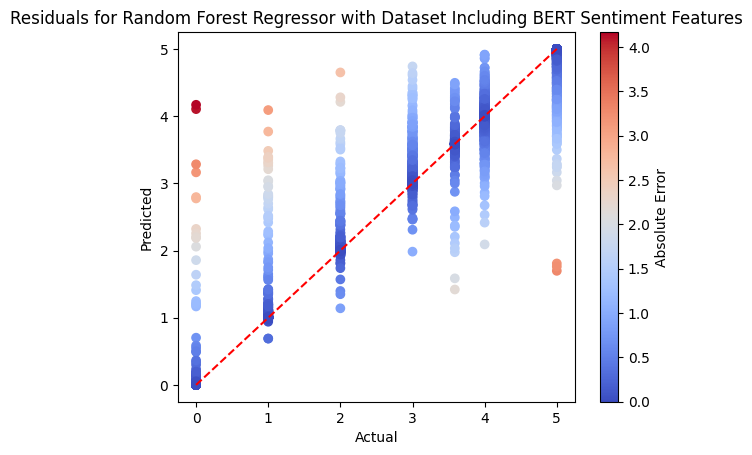

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
errors = y_test - y_pred_bert
error_magnitude = np.abs(errors)

# Scatter plot
plt.scatter(y_test, y_pred_bert, c=error_magnitude, cmap='coolwarm', alpha=1.0)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ideal line
plt.colorbar(label='Absolute Error')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Residuals for Random Forest Regressor with Dataset Including BERT Sentiment Features")
plt.show()

In [37]:

rf = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train_bert, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train_bert.columns

# Create a DataFrame for better visualization
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importance)

                   Feature  Importance
18      User rating_scaled    0.196243
7           Website rating    0.178953
17    Comment count_scaled    0.141478
16       Like count_scaled    0.112232
6                  summary    0.091335
0               Movie name    0.079395
8            review_length    0.065945
9        review_word_count    0.054431
4           original_title    0.014331
20  bert_sentiment_numeric    0.013610
19          bert_sentiment    0.010992
10           budget_scaled    0.007112
15       popularity_scaled    0.006521
14       vote_count_scaled    0.006234
12          runtime_scaled    0.005434
5                 overview    0.004868
11          revenue_scaled    0.004768
13     vote_average_scaled    0.004496
3        original_language    0.001100
1                   status    0.000265
2                    adult    0.000259


In [38]:
# VALIDATING MODEL

rf = RandomForestRegressor(n_estimators=100, random_state=123)

cross_val_5 = cross_validate(rf, X_bert, y, cv = 5, scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])

print("CROSS VALIDATION METRICS FOR 5-FOLD:")
print("Mean Absolute Error: ", -cross_val_5['test_neg_mean_absolute_error'].mean())
print("Mean Squared Error: ", -cross_val_5['test_neg_mean_squared_error'].mean())
print("R2: ", cross_val_5['test_r2'].mean())
print()
print()

cross_val_10 = cross_validate(rf, X_bert, y, cv = 10, scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])

print("CROSS VALIDATION METRICS FOR 10-FOLD:")
print("Mean Absolute Error: ", -cross_val_10['test_neg_mean_absolute_error'].mean())
print("Mean Squared Error: ", -cross_val_10['test_neg_mean_squared_error'].mean())
print("R2: ", cross_val_10['test_r2'].mean())


CROSS VALIDATION METRICS FOR 5-FOLD:
Mean Absolute Error:  0.13733661769091227
Mean Squared Error:  0.1331666772810477
R2:  0.8984758665381424


CROSS VALIDATION METRICS FOR 10-FOLD:
Mean Absolute Error:  0.12880211531856003
Mean Squared Error:  0.12427752170549045
R2:  0.9061016593886206


In [39]:
correlation = merged[['bert_sentiment_numeric', 'vader_score']].corr().iloc[0,1]
print(f"Correlation between BERT and VADER scores: {correlation:.2f}")

Correlation between BERT and VADER scores: 0.18


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb



# def report funcs

def regression_report(y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    return {
        "MAE" : mean_absolute_error(y_true, y_pred),
        "MSE" : mse,
        "RMSE": np.sqrt(mse),
        "R2"  : r2_score(y_true, y_pred)
    }

def cv_report(model, X, y, cv):
    scoring = {
        "MAE": "neg_mean_absolute_error",
        "MSE": "neg_mean_squared_error",
        "R2" : "r2"
    }
    cv_res = cross_validate(model, X, y, cv=cv, scoring=scoring,
                            n_jobs=-1, return_train_score=False)
    mae  = -cv_res["test_MAE"].mean()
    mse  = -cv_res["test_MSE"].mean()
    rmse = np.sqrt(mse)
    r2   =  cv_res["test_R2"].mean()
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv10 = KFold(n_splits=10, shuffle=True, random_state=42)
top_k     = 15
rnd_state = 42


# XGBoost regressor

xgb_model = xgb.XGBRegressor(
    random_state=rnd_state,
    objective="reg:squarederror",
    n_estimators=500, #CHANGED FROM 300 TO 500
    learning_rate=0.05,
    max_depth=10 # CHANGED FROM 6 TO 10
)

# New subset with only numeric
X_bert_numeric = X_bert.loc[:, ['Movie name', 'status', 'adult', 'original_language', 'Website rating', 'review_length', 'review_word_count', 'budget_scaled', 'revenue_scaled', 'runtime_scaled', 'vote_average_scaled', 'vote_count_scaled', 'popularity_scaled', 'Like count_scaled', 'Comment count_scaled', 'User rating_scaled', 'bert_sentiment', 'bert_sentiment_numeric']]
# Convert 'object' columns to numerical using Label Encoding
label_encoder = LabelEncoder()
for col in ['Movie name', 'bert_sentiment']:
    X_bert_numeric[col] = label_encoder.fit_transform(X_bert_numeric[col].astype(str))

X_train_bert_xg, X_test_bert_xg, y_train, y_test = train_test_split(X_bert_numeric,y, test_size = 0.3, random_state = 234)



xgb_model.fit(X_train_bert_xg, y_train)

xgb_train_pred = xgb_model.predict(X_train_bert_xg)
xgb_test_pred  = xgb_model.predict(X_test_bert_xg)

xgb_metrics_train = regression_report(y_train, xgb_train_pred)
xgb_metrics_test  = regression_report(y_test,  xgb_test_pred)
xgb_metrics_cv    = cv_report(xgb_model, X_bert_numeric, y, cv)
xgb_metrics_cv10    = cv_report(xgb_model, X_bert_numeric, y, cv10)

xgb_imp = (
    pd.Series(xgb_model.feature_importances_, index=X_bert_numeric.columns)
      .sort_values(ascending=False)
      .head(top_k)
)


# results

print("\n=== XGBoost Metrics ===")
print("Train :", xgb_metrics_train)
print("Test  :", xgb_metrics_test)
print("CV(5) :", xgb_metrics_cv)
print("CV(10) :", xgb_metrics_cv10)

print("\nTop‑{} XGB feature importances:".format(top_k))
print(xgb_imp.to_string(float_format="%.4f"))


=== XGBoost Metrics ===
Train : {'MAE': 0.02730089210425485, 'MSE': 0.004754420291212546, 'RMSE': np.float64(0.06895230446629427), 'R2': 0.9963452447021313}
Test  : {'MAE': 0.13200713330016878, 'MSE': 0.12270445440683675, 'RMSE': np.float64(0.3502919559550815), 'R2': 0.9051511661272316}
CV(5) : {'MAE': np.float64(0.12277620299933256), 'MSE': np.float64(0.1141981724908302), 'RMSE': np.float64(0.3379322010268187), 'R2': np.float64(0.9120367355071028)}
CV(10) : {'MAE': np.float64(0.11788278630872699), 'MSE': np.float64(0.10834987943681548), 'RMSE': np.float64(0.3291654286780668), 'R2': np.float64(0.9166202730229369)}

Top‑15 XGB feature importances:
User rating_scaled       0.2701
Website rating           0.1492
Comment count_scaled     0.1228
bert_sentiment_numeric   0.0787
Like count_scaled        0.0704
bert_sentiment           0.0644
review_word_count        0.0600
Movie name               0.0527
review_length            0.0473
revenue_scaled           0.0240
vote_count_scaled       

# Plotting Residuals for XGBoost

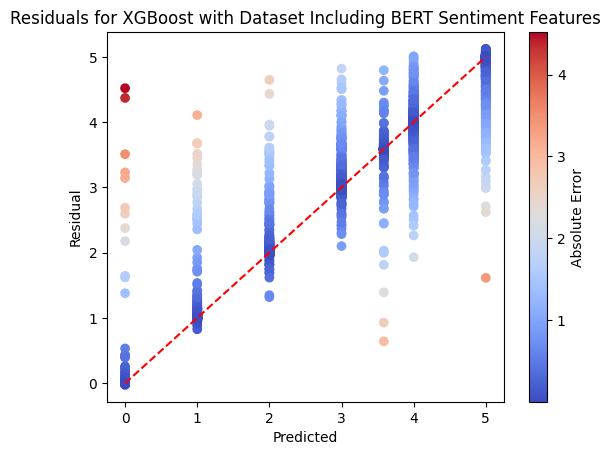

In [82]:
y_pred_xg_bert = xgb_model.predict(X_test_bert_xg)
residuals_xg = y_test - y_pred_xg_bert


error_magnitude_xg = np.abs(residuals_xg)

plt.scatter(y_test, y_pred_xg_bert, c=error_magnitude_xg, cmap='coolwarm', alpha=1.0)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.colorbar(label='Absolute Error')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals for XGBoost with Dataset Including BERT Sentiment Features")
plt.show()
